nuclear not green and stuc for 10 years
forecasts for produciton/consuption per type and region
predictions 6 years back (try to find datasets covering periods before covid)
plan horizon for most companies 3 years
find a region to use as example (österåker/osteraker)


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import streamlit as st
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

# from jupyter_dash import JupyterDash
# from dash import Dash, dcc, html, Input, Output


In [115]:
leveranser_flytande = pd.read_table('../data/to-use/leveranser-flytande-bransle-region-ar.csv', sep=',')
elproduction_bransleanvandning = pd.read_table('../data/to-use/elproduction-bransleanvandning-region-produktionssatt-bransletyp-ar.csv', sep=',')
fjarrvarmeproduktion = pd.read_table('../data/to-use/fjarrvarmeproduktion-region-produktionssatt-bransletyp-ar.csv', sep=',')
slutanvandning = pd.read_table(
    '../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')
branslefarbrukning = pd.read_table('../data/to-use/branslefarbrukning-far-produktion-per-ar.csv', sep=',')
energidata = pd.read_table('../data/to-use/energidata-per-ar.csv', sep=',')


In [116]:
datasets = [leveranser_flytande, elproduction_bransleanvandning, 
            fjarrvarmeproduktion, slutanvandning, branslefarbrukning, energidata]

variables = ['region', 'bransletyp', 'ar', 'm3', 'farbrukarkategori', 'produktionssatt',
             'MWh', 'kategori', 'energityp', 'produktionsslag', 'branslefarbrukning']



In [117]:
for d in datasets:
    d.ar = d.ar.astype(int)

In [118]:
for d in datasets:
    name = [x for x in globals() if globals()[x] is d][0]
    print('Dataframe: ', name)
    
    contains_nulls = d.isna().sum().sum()
    print('Number of Nuls: ', contains_nulls, 'out of', len(d))
    print(d.describe(include='object'))



Dataframe:  leveranser_flytande
Number of Nuls:  214174 out of 353854
               region bransletyp           forbrukarkategori  \
count          353854     353854                      279360   
unique            313         23                          11   
top     1461 Mellerud     etanol  jordbruk, skogsbruk, fiske   
freq             1198      40241                       27936   

       fornybar_bransletyp  
count               353854  
unique                   3  
top          icke-fornybar  
freq                217168  
Dataframe:  elproduction_bransleanvandning
Number of Nuls:  0 out of 194832
          region                         produktionssatt    bransletyp  \
count     194832                                  194832        194832   
unique       313                                       5             9   
top     00 Riket  kraftv�rmeverk + industriellt mottryck  elproduktion   
freq         624                                   41220         23728   

       fornybar_b

SelectMultiple(description='Region:', options=('00 Riket', '0114 Upplands V�sby', '0115 Vallentuna', '0117 �st…

C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_15400\383027611.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rs = pd.Series(regions_selection.value)


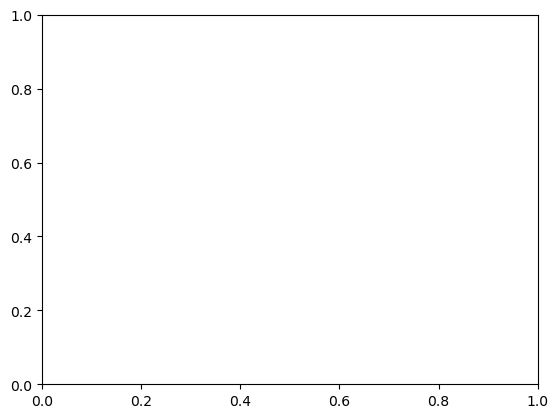

In [140]:
regions_selection = widgets.SelectMultiple(
    options=list(leveranser_flytande.region.drop_duplicates(
        keep='first').reset_index(drop=True)),
    rows=20,
    description='Region:',
    disabled=False,
)
display(regions_selection)


In [145]:
rs = pd.Series(regions_selection.value)
rs

data = leveranser_flytande.where(
    leveranser_flytande.region.isin(rs)).dropna().reset_index(drop=True)

fuel_selection = widgets.SelectMultiple(
    options=list(data.bransletyp.drop_duplicates(
        keep='first').reset_index(drop=True)),
    rows=20,
    description='Region:',
    disabled=False,
)
display(fuel_selection)


SelectMultiple(description='Region:', options=('bensin', 'diesel', 'etanol', 'eldningsolja 1', 'eldningsolja 2…

In [ ]:

# leveranser_flytande = leveranser_flytande.set_index(leveranser_flytande.region, drop=True, inplace=True)


fig1 = sns.lineplot(data=d, x='ar',
                    y='region', hue='fornybar_bransletyp')
plt.show(fig1)


In [138]:
rs = pd.Series(regions_selection.value)
rs

0          0160 T�by
1      0162 Danderyd
2    0181 S�dert�lje
dtype: object

In [131]:
len(leveranser_flytande)

353854

In [139]:
# leveranser_flytande = leveranser_flytande.set_index(leveranser_flytande.region, drop=True, inplace=True)
d = leveranser_flytande.where(leveranser_flytande.region.isin(rs)).dropna().reset_index(drop=True)

d

,region,bransletyp,ar,m3,forbrukarkategori,fornybar_bransletyp
0,0160 T�by,bensin,2016.0,0.0,"jordbruk, skogsbruk, fiske",icke-fornybar
1,0160 T�by,bensin,2016.0,0.0,industri,icke-fornybar
2,0160 T�by,bensin,2016.0,0.0,el- och v�rmeverk,icke-fornybar
3,0160 T�by,bensin,2016.0,0.0,offentlig f�rvaltning,icke-fornybar
4,0160 T�by,bensin,2016.0,0.0,enbostadshus,icke-fornybar
...,...,...,...,...,...,...
1435,0181 S�dert�lje,HVO,2021.0,0.0,flerbostadshus,fornybar
1436,0181 S�dert�lje,HVO,2021.0,0.0,�vriga fastigheter,fornybar
1437,0181 S�dert�lje,HVO,2021.0,36510.7,v�gtransporter,fornybar
1438,0181 S�dert�lje,HVO,2021.0,3.0,"bygg, luftfart, j�rnv�g, bunkring",fornybar


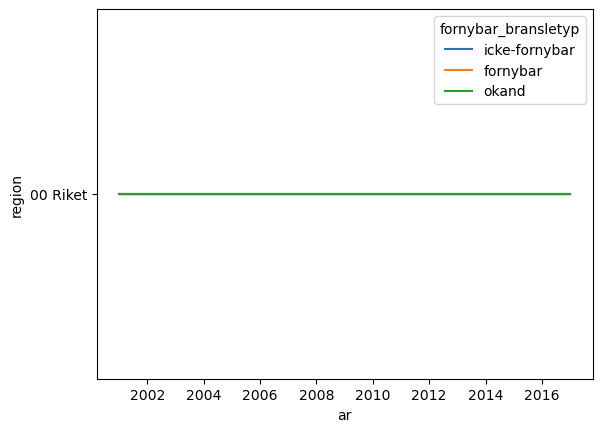

In [76]:
# leveranser_flytande


fig1 = sns.lineplot(data=leveranser_flytande.where(leveranser_flytande.region == regions_selection.value), x='ar',
                    y='region', hue='fornybar_bransletyp')
plt.show(fig1)

        # print('Column: ', column, '\n', d[column].drop_duplicates(
        #     keep='first').reset_index(drop=True))

        # fig1 = sns.lineplot(data=d, x='ar', y=d[column])

        # # fig2 = sns.lineplot(data=d, x='ar', y=d[column], hue='region')
        # # plt.show(fig2)


    


Problem statement:

Situation: Energy is produced in different forms and consumed by the regions in different rates.   

Complication: Energy prices are increasing due to many reasons including but not limited to war, logistics and sanctions.   

Question: Is it possible to see what types of energy have been historically produced and consumed by the different regions? Is it possible to predict how the productions and consumption will look like in the future?   

Answer: ???
